# 2. Gradient Descent for Regression

## Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Useful Functions

In [13]:
def linPredict(row: np.ndarray, coeffs: np.ndarray):
    yHat = coeffs[0]
    for i in range(len(coeffs) - 1):
        yHat += coeffs[i + 1] * row[i]
    return yHat

def makePoly(x: float, p: int):
    row = np.array([])
    for i in range(0, p + 1):
        row = np.append(row, x**i)
    return row

def calcMSE(coeffs: np.ndarray, data_x: np.ndarray, data_y: np.ndarray,
            degree: int, count=-1):
    if count == -1:
        count = len(data_x)
    mse = 0
    for i in range(0, count):
        row = makePoly(data_x[i], degree)
        result = coeffs.T.dot(row)
        mse += ((result - data_y[i]) ** 2)
    mse /= count
    return mse

In [31]:
def sgd(data, l_rate, n_epoch):
    coeffs = np.array([3.0, 3.0])
    mse_train_arr = np.array([])
    mse_valid_arr = np.array([])
    mse_test_arr = np.array([])
    for epoch in range(n_epoch):
        for xy in data:
            yHat = linPredict(xy, coeffs)
            error = yHat - xy[-1]  # assume last element is y
            coeffs[0] = coeffs[0] - l_rate * error
            coeffs[1] = coeffs[1] - l_rate * error * xy[0]
        mse_train_arr = np.append(mse_train_arr, calcMSE(coeffs, train_x, train_y, 1))
        mse_valid_arr = np.append(mse_valid_arr, calcMSE(coeffs, valid_x, valid_y, 1))
        mse_test_arr = np.append(mse_test_arr, calcMSE(coeffs, test_x, test_y, 1))
    return mse_train_arr, mse_valid_arr, mse_test_arr

#### Solution

In [32]:
# Load data
train = np.genfromtxt('./data/Dataset_2_train.csv', delimiter=',', usecols=(0, 1))
valid = np.genfromtxt('./data/Dataset_2_valid.csv', delimiter=',', usecols=(0, 1))
test = np.genfromtxt('./data/Dataset_2_test.csv', delimiter=',', usecols=(0, 1))

# Create sets
train_x = train[:, 0]
train_y = train[:, 1]
valid_x = valid[:, 0]
valid_y = valid[:, 1]
test_x = test[:, 0]
test_y = test[:, 1]

Min MSE Valid: 1.19109, Rate: 0.000001
Min MSE Test: 1.11541, Rate: 0.000001


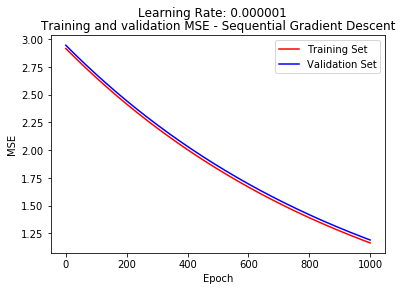

In [33]:
# Calculate SGD for 1E-6 step size
rate = 1 * (10 ** -6)
nEpoch = 1000
mse_train, mse_valid, mse_test = sgd(train, rate, nEpoch)
print('Min MSE Valid: %.5f, Rate: %.6f' % (min(mse_valid), rate))
print('Min MSE Test: %.5f, Rate: %.6f' % (min(mse_test), rate))

# Plot
xx = np.linspace(0, nEpoch, nEpoch)
plt.figure(1)
mse_t, = plt.plot(xx, mse_train, color='r', label='Training set')
mse_v, = plt.plot(xx, mse_valid, color='blue', label='Validation set')
plt.legend([mse_t, mse_v], ['Training Set', 'Validation Set'])
plt.title('Training and validation MSE - Sequential Gradient Descent')
plt.suptitle('Learning Rate: %.6f' % rate)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

## Part 2

Min MSE Valid: 0.87339, Rate: 1.000000
Min MSE Test: 0.81269, Rate: 1.000000


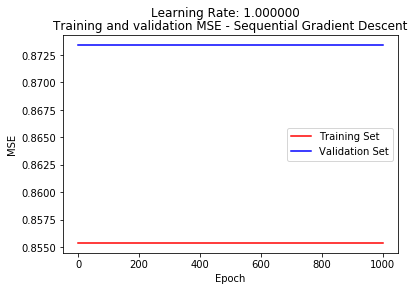

Min MSE Valid: 0.10027, Rate: 0.100000
Min MSE Test: 0.08790, Rate: 0.100000


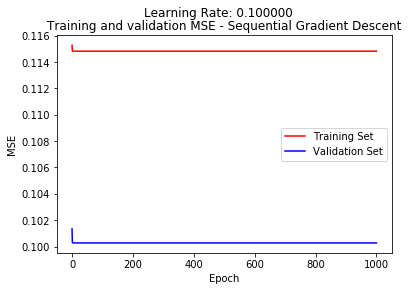

Min MSE Valid: 0.07386, Rate: 0.010000
Min MSE Test: 0.06888, Rate: 0.010000


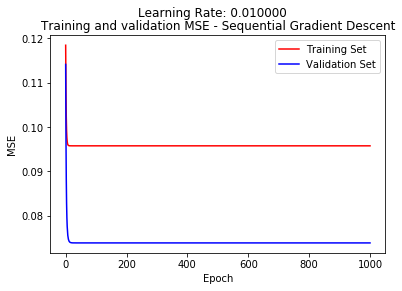

Min MSE Valid: 0.07399, Rate: 0.001000
Min MSE Test: 0.06872, Rate: 0.001000


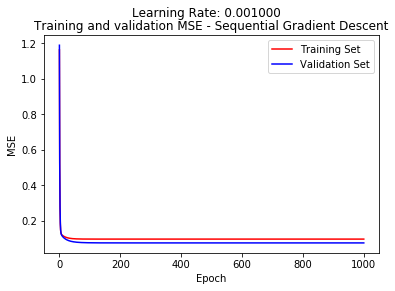

Min MSE Valid: 0.07484, Rate: 0.000100
Min MSE Test: 0.06873, Rate: 0.000100


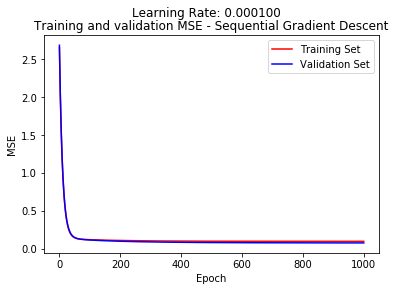

Min MSE Valid: 0.11329, Rate: 0.000010
Min MSE Test: 0.08732, Rate: 0.000010


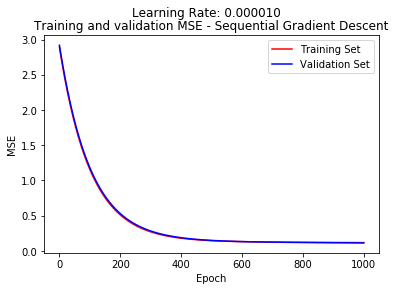

In [34]:
# Apply SGD And report results for different step sizes
for i in range(0, 6):
    rate = 1 * (10 ** -i)
    nEpoch = 1000
    mse_train, mse_valid, mse_test = sgd(train, rate, nEpoch)
    print('Min MSE Valid: %.5f, Rate: %.6f' % (min(mse_valid), rate))
    print('Min MSE Test: %.5f, Rate: %.6f' % (min(mse_test), rate))

    xx = np.linspace(0, nEpoch, nEpoch)
    plt.figure(1)
    mse_t, = plt.plot(xx, mse_train, color='r', label='Training set')
    mse_v, = plt.plot(xx, mse_valid, color='blue', label='Validation set')
    plt.legend([mse_t, mse_v], ['Training Set', 'Validation Set'])
    plt.title('Training and validation MSE - Sequential Gradient Descent')
    plt.suptitle('Learning Rate: %.6f' % rate)
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.show()

The best MSE on the validation data came from the `0.01` step size calculation. The MSE is `0.07386` for the validation set and `0.06888` for the test set.

## Part 3
#### Useful Functions

In [48]:
def sgd(data, l_rate, n_epoch):
    coeffs = np.array([30.0, 30.0])
    mse_train_arr = np.array([])
    mse_valid_arr = np.array([])
    mse_test_arr = np.array([])
    for epoch in range(n_epoch):
        for xy in data:
            yHat = linPredict(xy, coeffs)
            error = yHat - xy[-1]  # assume last element is y
            coeffs[0] = coeffs[0] - l_rate * error
            coeffs[1] = coeffs[1] - l_rate * error * xy[0]
        mse_train_arr = np.append(mse_train_arr, calcMSE(coeffs, train_x, train_y, 1))
        mse_valid_arr = np.append(mse_valid_arr, calcMSE(coeffs, valid_x, valid_y, 1))
        mse_test_arr = np.append(mse_test_arr, calcMSE(coeffs, test_x, test_y, 1))
        
        # Plot the first 5 curves which show the convergence the most
        if epoch in range(0, 5):
            xs = np.linspace(0, max(train_x), len(train_x) * 100)
            yy = np.array([])
            for x in xs:
                yy = np.append(yy, linPredict(np.array([x]), coeffs))
            plt.scatter(test_x, test_y, color='r')
            plt.plot(xs, yy, color='blue')
            plt.title('Linear Regression against Test data - Sequential Gradient Descent')
            plt.suptitle('Learning Rate: %.6f, Epoch: %d' % (l_rate, epoch))
            plt.show()
            
    return mse_train_arr, mse_valid_arr, mse_test_arr

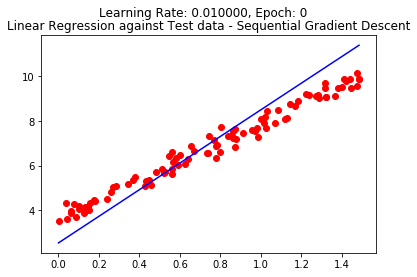

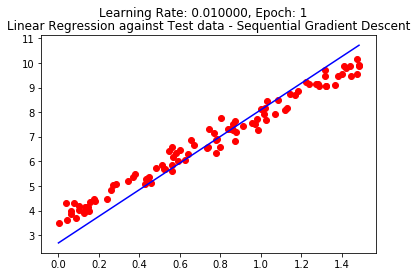

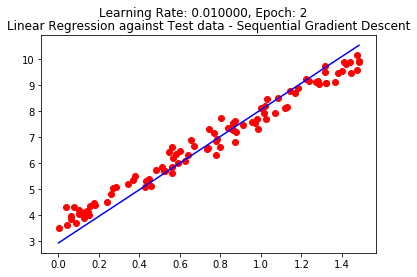

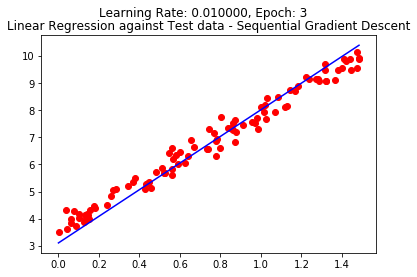

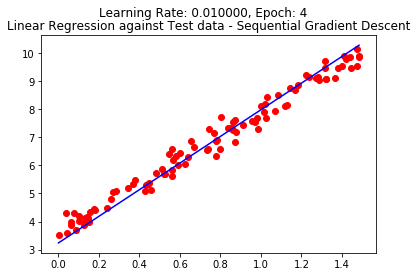

In [49]:
mse_train, mse_valid, mse_test = sgd(train, 0.01, 1000)

Note that to be able to show a nice convergence of the fit to the optimal fit, we have to take values that are very off from the optimal coefficients to begin the search with. For my original problem I used the values `3, 3` for `w0` and `w1` as they lead to a faster convergence. Values like `30, 30` were chosen here to show the actual effect of the line converging.